<h1>Introduction to pandas, matplotlib. Linear Regression</h1>

This notebook provides an example code of <b>pandas</b> and <b>matplotlib</b> introduction, and analyse of <b>car prices</b> using linear regression. <br>
The dependent variable which we will use in linear regression is car prices. We would like to understand what variables have significant relationship with prices of different cars.

<br>The general sequence of steps that we will follow is the following:
1. [Importing libraries](#lib)
2. [Pandas: reading and describing the data](#pandas)
3. [Matplotlib](#mpl)
4. [Running and fitting Linear Regression](#reg)
5. [Interpretation of the results of Linear Regression](#interp)

<h1>Importing libraries</h1> <a name="lib"></a>

- A library is a collection of functions which we will use to do analysis. Libraries may contain not only functions but also data values (e.g., numerical constants).
- Python's <a><a href="https://docs.python.org/3/library/"> standard library </a> is installed with it. Many additional libraries are available from <a><a href="https://pypi.org/"> PyPI (the Python Package Index)</a>.
- Use <code>import</code> to load a library into a program's memory. Use <code>import...as...</code> to give a library a short alias while importing it. Then refer to items in the library using that shortened name <code>library_shortened_name.thing_name</code>. Python uses <b>"."</b> sign to mean "part of" something(e.g. library, DataFrame).
    
<b>!Note: Before starting your analysis, first import all the libraries you're going to use in your script.</b>

In [1]:
import pandas as pd #to read and manipulate data
import matplotlib.pyplot as plt #to draw graphs
import numpy as np #to do scientific computing if any
from statsmodels.formula.api import ols #for linear regression

<h1>Pandas: reading and describing the data</h1><br> <a name="pandas"></a>
<b>pandas</b> is designed to make it easier to work with structured data. The DataFrame object in pandas is "a two-dimensional tabular, column-oriented data structure with both row and column labels."

To import data of CSV format we can use <code>read_csv()</code> function from pandas. If your data is in Excel format, then <code>pd.read_excel()</code> function from pandas can be used. The mentioned functions return a DataFrame. If you want to specify what sheets to read or change other parameters, see the documentation <a><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">here</a>.

In [2]:
data=pd.read_csv("car_data.csv") 

After reading the data, we want to see how it looks, what are the variables (columns), how many observations are in the data, how the data is distributed, etc. 
First, let's see how the data look using head() function from pandas.

In [3]:
data.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


If you want to print more than 5 rows, you should change parameters in the function. <br>
Let's print the first 12 rows of the data.

In [4]:
data.head(n=12)

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,gas,two,sedan,fwd,front,99.8,177.3,66.3,53.1,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,gas,four,wagon,fwd,front,105.8,192.7,71.4,55.7,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,gas,four,sedan,fwd,front,105.8,192.7,71.4,55.9,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,bmw,gas,two,sedan,rwd,front,101.2,176.8,64.8,54.3,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


<code>tail()</code> from pandas lets to print last values of the data. Let's print the last 5 values of the data.

In [5]:
data.tail()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
188,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
189,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
190,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
191,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
192,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


We can use <code>head()</code> and <code>tail()</code> to print not only the rows of the whole data but for several variables. <br>
Let's print the first 10 values of only two variables.

In [6]:
data[["make","price"]].head(10)

,make,price
0,alfa-romero,13495
1,alfa-romero,16500
2,alfa-romero,16500
3,audi,13950
4,audi,17450
5,audi,15250
6,audi,17710
7,audi,18920
8,audi,23875
9,bmw,16430


Sorting data by any variable using <code>sort_values()</code> function.

In [7]:
data[["make","price"]].sort_values(by="price", ascending=False).head(10)

,make,price
65,mercedes-benz,45400
15,bmw,41315
64,mercedes-benz,40960
119,porsche,37028
16,bmw,36880
45,jaguar,36000
44,jaguar,35550
63,mercedes-benz,35056
62,mercedes-benz,34184
118,porsche,34028


<code>Shape</code> attribute can be used to get number of rows and columns in the data.

In [8]:
print(data.shape)

(193, 23)


Using <code>iloc(), loc()</code> functions to select rows or columns.

In [9]:
data.loc[1:5,"price"]

1    16500
2    16500
3    13950
4    17450
5    15250
Name: price, dtype: int64

In [10]:
data.loc[1:5,["price","make"]]

,price,make
1,16500,alfa-romero
2,16500,alfa-romero
3,13950,audi
4,17450,audi
5,15250,audi


In [11]:
data.iloc[1:5,[0,2,3,4]]

,make,num_of_doors,body_style,drive_wheels
1,alfa-romero,two,convertible,rwd
2,alfa-romero,two,hatchback,rwd
3,audi,four,sedan,fwd
4,audi,four,sedan,4wd


Let's print the list of all variables to see the type of each variable and number of observations for each column. <br>
For this purpose we need to use <code>info()</code> function.

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 23 columns):
make                 193 non-null object
fuel_type            193 non-null object
num_of_doors         193 non-null object
body_style           193 non-null object
drive_wheels         193 non-null object
engine_location      193 non-null object
wheel_base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb_weight          193 non-null int64
engine_type          193 non-null object
num_of_cylinders     193 non-null object
engine_size          193 non-null int64
fuel_system          193 non-null object
bore                 193 non-null float64
stroke               193 non-null float64
compression_ratio    193 non-null float64
horsepower           193 non-null int64
peak_rpm             193 non-null int64
city_mpg             193 non-null int64
highway_mpg          193 non-nul

As can be seen, for example "fuel_type" is a string variable (object) but price is numeric (float). Each variable contains 193 observations. so there are no missing values.

If you want to check whether there are missing values <code>isnull(),isna()</code> functions can be used.

In [13]:
data.isnull().sum()

make                 0
fuel_type            0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

A useful method that generates various summary statistics is <code>describe()</code>. If the DataFrame includes both numeric and object (e.g., strings) dtypes, it will default to summarizing the numeric data. If .describe() is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count.

In [14]:
data.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


From the output, we assume that the distribution of price is quite skewed. 

We can use <code>max(), min(), mean(), median()</code> functions to get respective statistics. 

In [15]:
print(data.price.mean())
print(data.price.median())
print(data.price.min())
print(data.price.max())

13285.025906735751
10245.0
5118
45400


<h1>Matplotlib</h1> <a name="mpl"></a>

<a><a href="https://matplotlib.org/tutorials/index.html"><b> Matplotlib</b></a> is a Python 2D plotting library. It is used in the Python scripts and shells, as well as in the IPython shells and Jupyter Notebook to generate figures and plots in a different formats. One of the advantages of the library is being open-source and free. Its <b> pyplot </b> module is an MATLAB-like interface which is very easy to use for simple plotting. It lets you to customize a figure by having control on line, axes, font styles, etc. <br>
    
<b>To use basic plots from matplotlib, you can use this <a><a href="https://nbviewer.jupyter.org/github/Parandzem-S/Blog_metric.am/blob/master/blog1_ps_matplotlib.ipynb#line">script</a></b>.

Let's use histogram to make sure that the distribution of car prices is really skewed. 

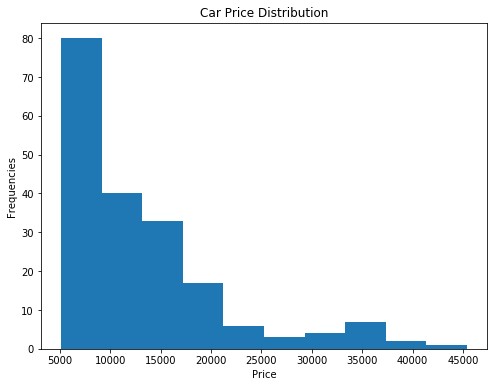

In [16]:
plt.figure(figsize=(8,6)) #making the graph bigger
plt.hist(data.price)
plt.title("Car Price Distribution") #giving a title to the graph
plt.ylabel("Frequencies")#giving title to y axis
plt.xlabel("Price")#giving title to x axis
plt.show()#showing the plot

As histogram shows the distribution of car prices is really right skewed.

Let's drow a plot that will show the relationship between two variable. <b>Scatter plot</b> can be used for this purpose.

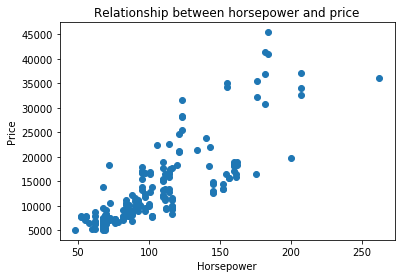

In [17]:
plt.scatter(data.horsepower,data.price)
plt.title("Relationship between horsepower and price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()

<b>The scatter plot shows that there is a positive linear realtionship between price and horsepower of a car.</b>

<h1>Linear Regression</h1> <a name="reg"></a>

Let's run linear regression between price and some variables from the data to see what are the predictors of car prices.

We will use <code>ols()</code> function from statsmodels.

<b>First, let's run the model.</b>

In [18]:
model=ols(formula="price~horsepower+engine_size+num_of_doors", data=data)

<b>Second, let's fit the model.</b>

In [19]:
results=model.fit()

<b>Third, let's get the summary of the constructed model.</b>

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sun, 10 Feb 2019   Prob (F-statistic):           1.86e-67
Time:                        22:41:21   Log-Likelihood:                -1850.8
No. Observations:                 193   AIC:                             3710.
Df Residuals:                     189   BIC:                             3723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8611.4261    862.666     -9.982      0.000   -1.03e+04   -6909.736
num_of_doors[T.two] -1171.0140    529.425     -2.212      0.028   -2215.355    -126.673
horsepower             50.7043     12.917      3.925      0.000      25.225      76.184
engine_size           133.7836     11.734     11.402      0.000     110.638     156.929
==============================================================================
Omnibus:                       13.667   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.052
Skew:                           0.273   Prob(JB):                     4.91e-07
Kurtosis:                       4.821   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>Interpretation of the results of Linear Regression</h1><a name="interp"></a>

- <b>R-squared and F-statistics</b>: As Prob (F-statistic) shows our model is statistically significant at 5% significance leve, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is quite big number and it shows that 83% of variance in car prices is explained by the variables included in the model.
- <b>Adj. R-squared</b>: As summary shows it's 82.4% and it is quite close to R-squared, which means that almost all variables included in the model have statistically significant relationship with car prices.
- <b>Statistically significant variables</b>: As p-values of t-statistics show, all variables included in the model are statistically significant at 5% sig. level (p<=0.05).
- <b>Coefficients (continous variable)</b>: Let's interpret for horsepower. For each unit increase in horsepower we will experience on average about 51 dollars increase in mean price of a car.
- <b>Coefficients (categorical variable)</b>: If a car has two doors rather than four then on average 1171 dollars decrease is expected in mean price of a car. 

<h2> <b>Final Model</b> </h2>

Price = -8611.4261 - 1171.0140 * num_of_doors(T.two)  + 50.7043* horsepower  + 133.7836 engine_size